In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
from hydra import compose, initialize
import os

# 加载项目层面的配置
with initialize(version_base=None, config_path="config"):
    cfg = compose(config_name="config")
os.chdir(cfg.root)

In [2]:
from abses_sce.analysis import MultipleAnalysis

analysis = MultipleAnalysis("out/multirun/2024-02-04/17-14-33")
analysis.show_overrides("model.loss_rate")

0    0.5
1    0.6
dtype: float64

In [3]:
analysis._cache_run_ids()

In [4]:
analysis.overrides

,model.loss_rate,hunter.is_complex
ID,,
0,0.5,200.0
1,0.5,300.0
2,0.5,400.0
3,0.6,200.0
4,0.6,300.0
5,0.6,400.0


In [5]:
df = analysis.get_dataset()
df.head()

,time,new_farmers,farmers_num,hunters_num,rice_num,len_hunters,len_farmers,len_rice,repeat,exp_id,model.loss_rate,hunter.is_complex
0,0,0,97.0,7308.0,0.0,374,2,0,1,0,0.5,200.0
1,1,0,155.0,7228.0,0.0,351,3,0,1,0,0.5,200.0
2,2,0,171.0,7156.0,0.0,334,3,0,1,0,0.5,200.0
3,3,0,365.0,7135.0,0.0,324,6,0,1,0,0.5,200.0
4,4,0,507.0,7031.0,0.0,312,8,0,1,0,0.5,200.0


In [6]:
analysis.show_overrides("model.loss_rate")
analysis.show_overrides()

0    0.5
1    0.6
dtype: float64

0      model.loss_rate
1    hunter.is_complex
dtype: object

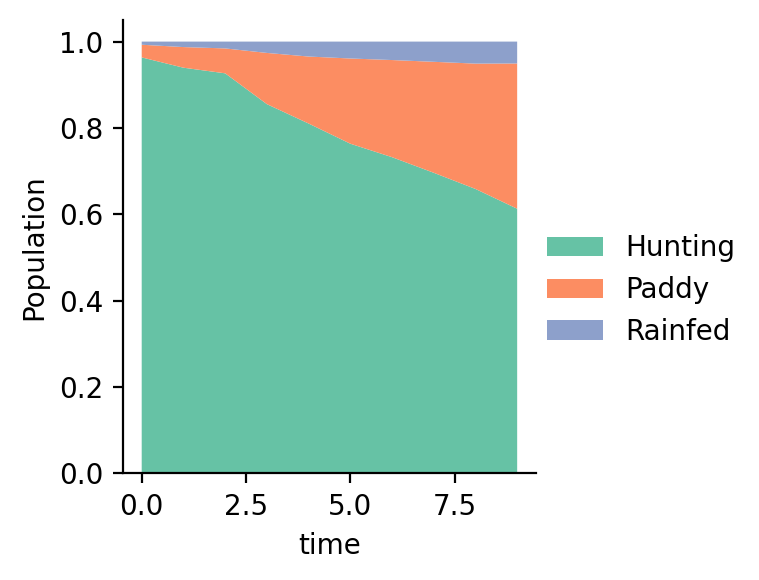

In [7]:
analysis.grid_stackplots("num")

In [11]:
data = analysis.get_dataset()
data.head()

,time,new_farmers,farmers_num,hunters_num,rice_num,len_hunters,len_farmers,len_rice,repeat,exp_id,model.loss_rate,hunter.is_complex
0,0,0,97.0,7308.0,0.0,374,2,0,1,0,0.5,200.0
1,1,0,155.0,7228.0,0.0,351,3,0,1,0,0.5,200.0
2,2,0,171.0,7156.0,0.0,334,3,0,1,0,0.5,200.0
3,3,0,365.0,7135.0,0.0,324,6,0,1,0,0.5,200.0
4,4,0,507.0,7031.0,0.0,312,8,0,1,0,0.5,200.0


In [39]:
from abses_sce.analysis import detect_breakpoints

overrides = analysis.overrides.columns.to_list()
grouped = data.groupby([*overrides, "time"])["farmers_num"].mean().reset_index(level=-1)

change_time = []
for x, y in analysis.overrides.itertuples(index=False):
    tmp_d = grouped.loc[(x, y)]
    ser = pd.Series(tmp_d["farmers_num"].values, index=tmp_d["time"].values)
    change_time.append(detect_breakpoints(series=ser))

result = analysis.overrides.copy()
result["change_time"] = change_time
result.head()

,model.loss_rate,hunter.is_complex,change_time
ID,,,
0,0.5,200.0,5
1,0.5,300.0,5
2,0.5,400.0,5
3,0.6,200.0,5
4,0.6,300.0,5
